# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

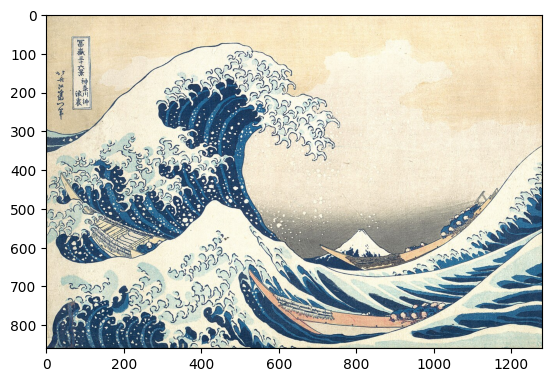

In [31]:
### START CODE HERE ###
img = cv2.imread('../images/Tsunami_by_hokusai_19th_century.jpg')[:,:,::-1]


plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [32]:
### START CODE HERE ###
def plot_histogram(image, channel):
    hist = cv2.calcHist([image], [channel], None, [256], [0,256])
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

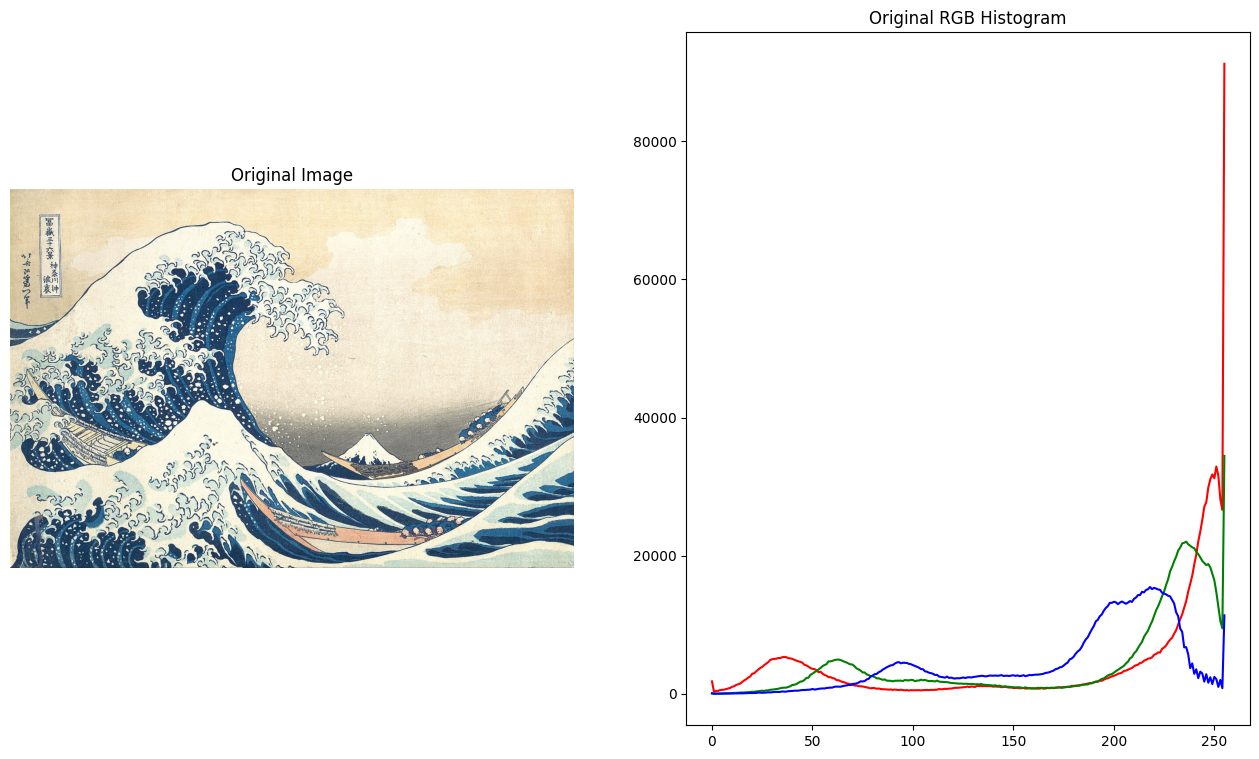

In [33]:
### START CODE HERE ###
def subplot(axs, img, title, cmap="viridis"):
    axs.imshow(img, cmap=cmap)
    axs.set_title(title)
    axs.axis('off')

fig, axs = plt.subplots(1, 2, figsize = (16, 9))

for i, color in enumerate(('r', 'g', 'b')): 
    hist = plot_histogram(img, i)
    axs[1].plot(hist,color = color)

axs[1].set_title('Original RGB Histogram')
subplot(axs[0], img, 'Original Image')


### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

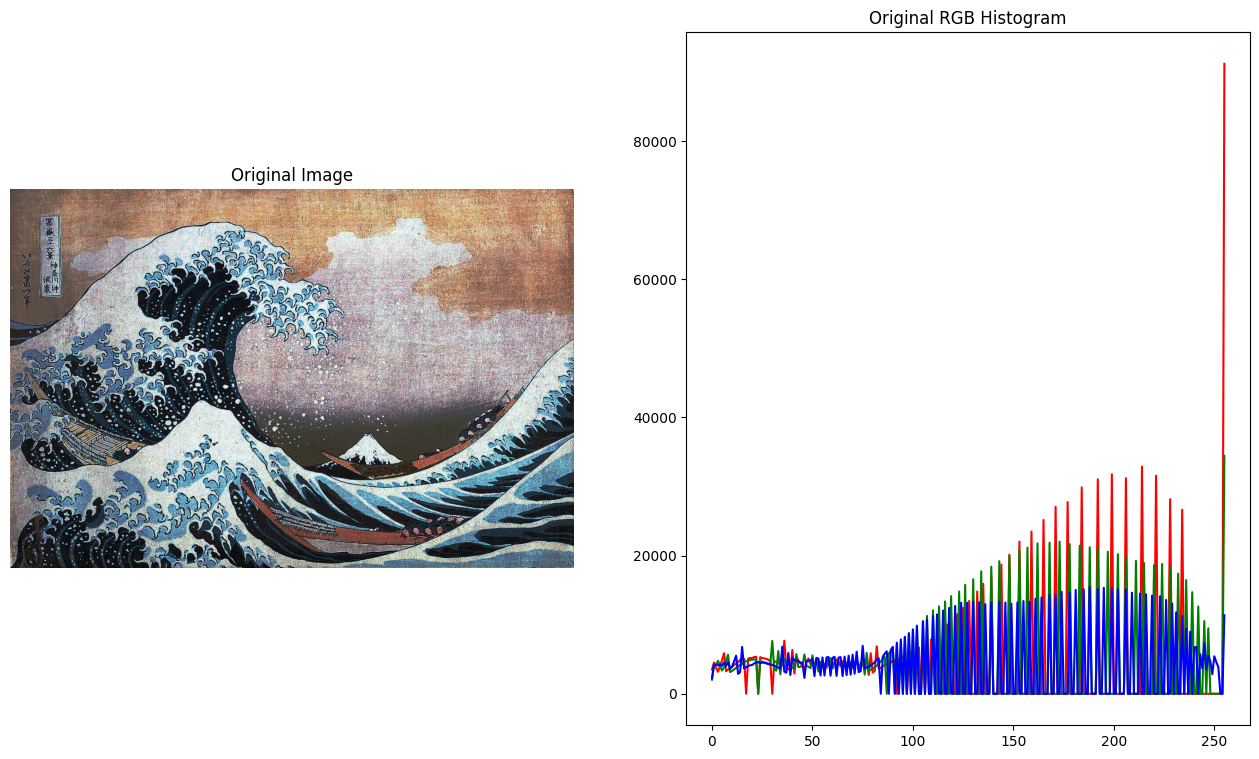

In [34]:
### START CODE HERE ###
def subplot(axs, img, title, cmap="viridis"):
    axs.imshow(img, cmap=cmap)
    axs.set_title(title)
    axs.axis('off')

equalized_img = []

fig, axs = plt.subplots(1, 2, figsize = (16, 9))
for i, color in enumerate(('r', 'g', 'b')): 
    equalized_img.append(cv2.equalizeHist(img[:,:,i]))
    hist = plot_histogram(equalized_img[i], 0)
    axs[1].plot(hist,color = color)

axs[1].set_title('Original RGB Histogram')
subplot(axs[0], np.transpose(np.array(equalized_img), (1,2,0)), 'Original Image')


### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [35]:
### START CODE HERE ###


img1 = cv2.imread('../images/Tsunami_by_hokusai_19th_century.jpg')[:,:,::-1]
img2 = cv2.imread('../images/pexels-jaime-reimer-1376930-2662116.jpg')[:,:,::-1]

### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

Text(0.5, 1.0, 'CDF')

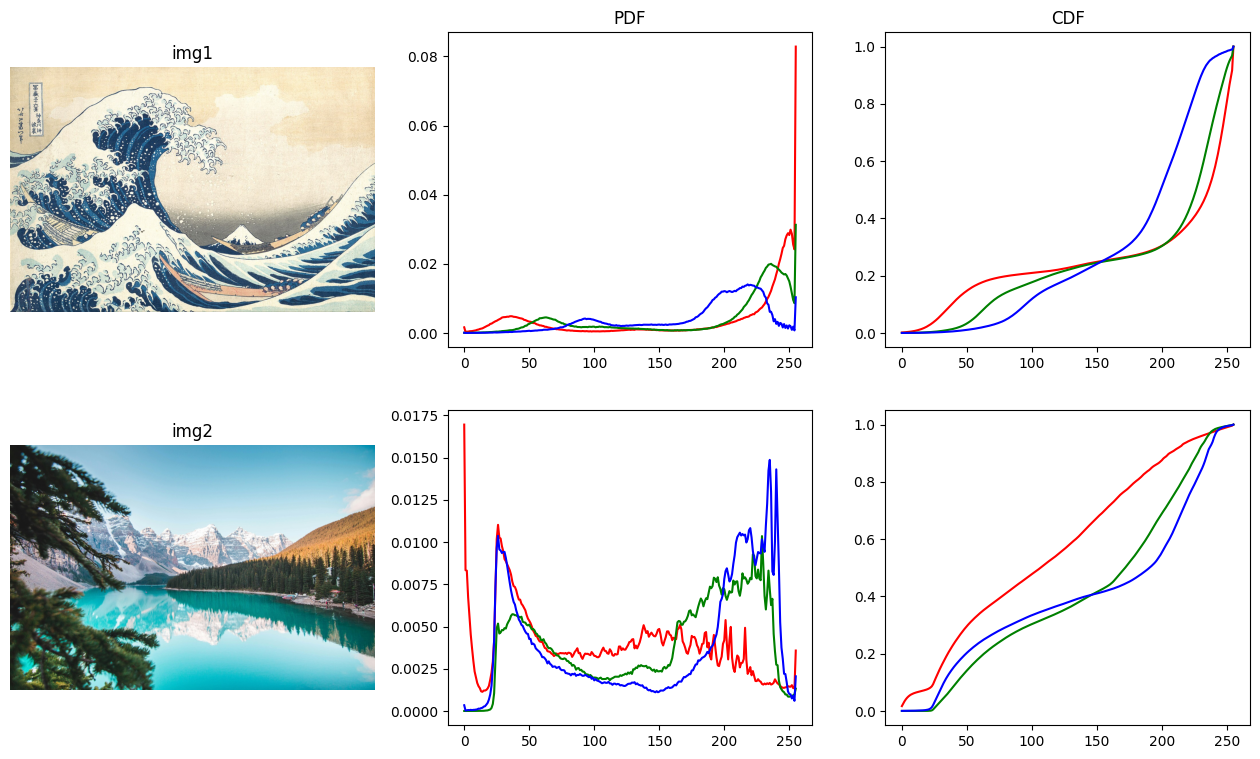

In [36]:
### START CODE HERE ###
def subplot(axs, img, title, cmap="viridis"):
    axs.imshow(img, cmap=cmap)
    axs.set_title(title)
    axs.axis('off')
    
def plot_pdf_cdf(axs, img, channel, color):
    hist = plot_histogram(img, channel)
    pdf = hist/np.sum(hist)
    cdf = np.cumsum(pdf)
    axs[1].plot(pdf ,color = color)
    axs[2].plot(cdf, color = color)
    return pdf, cdf

def plot_pdf_cdf_rgb(axs, img):
    for i, color in enumerate(('r', 'g', 'b')):
        plot_pdf_cdf(axs, img, i, color)

fig, axs = plt.subplots(2, 3, figsize = (16, 9))

subplot(axs[0,0], img1, 'img1')
plot_pdf_cdf_rgb(axs[0], img1)

subplot(axs[1,0], img2, 'img2')
plot_pdf_cdf_rgb(axs[1], img2)

axs[0, 1].set_title('PDF')
axs[0, 2].set_title('CDF')

### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

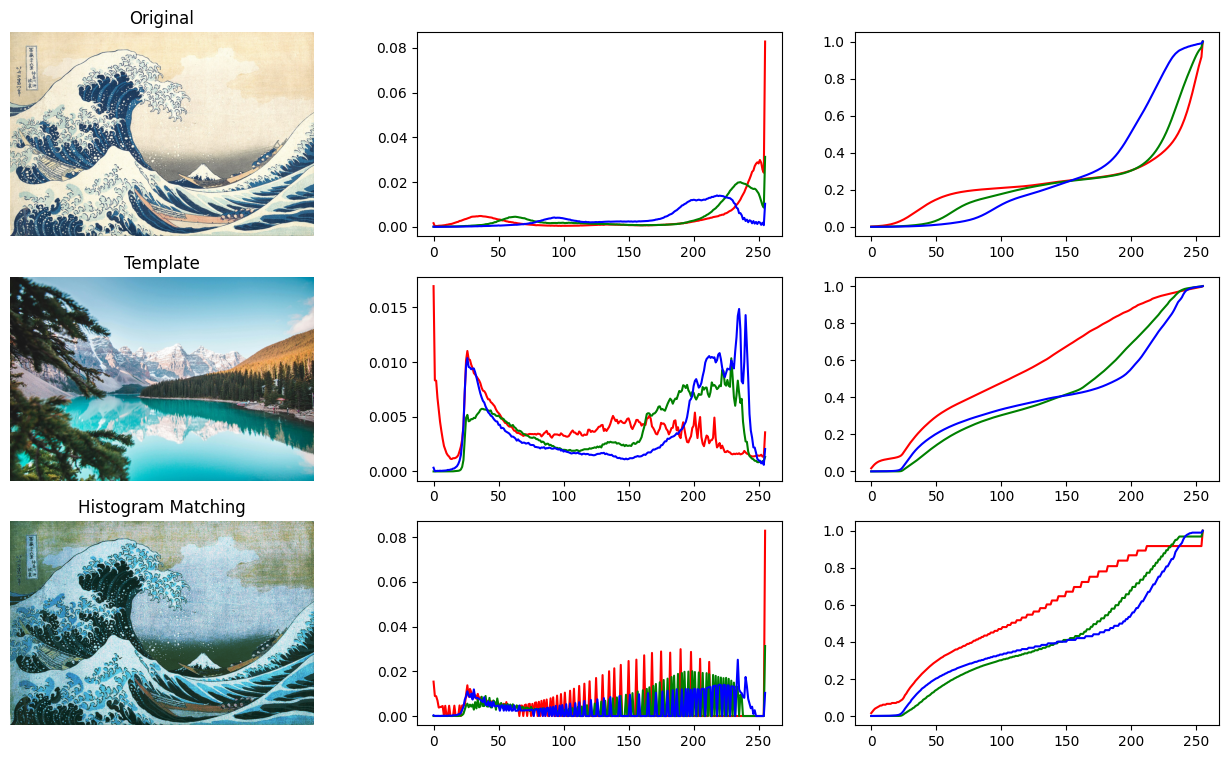

In [37]:
### START CODE HERE ###
def subplot(axs, img, title, cmap="viridis"):
    axs.imshow(img, cmap=cmap)
    axs.set_title(title)
    axs.axis('off')
    
def plot_pdf_cdf(axs, img, channel, color):
    hist = plot_histogram(img, channel)
    pdf = hist/np.sum(hist)
    cdf = np.cumsum(pdf)
    axs[1].plot(pdf ,color = color)
    axs[2].plot(cdf, color = color)
    return pdf, cdf

def plot_pdf_cdf_rgb(axs, img):
    for i, color in enumerate(('r', 'g', 'b')):
        plot_pdf_cdf(axs, img, i, color)
        
def histogram_mapping(cdf1, cdf2):
    map_hist = [0] * len(cdf1)
    p_cdf2 = 0
    for p_cdf1 in range(len(cdf1)):
        while(p_cdf2 < len(cdf2) and cdf1[p_cdf1] > cdf2[p_cdf2]):
            p_cdf2 += 1
        if (p_cdf2 >= len(cdf2) - 1) or abs(cdf2[p_cdf2] - cdf1[p_cdf1]) < abs(cdf2[p_cdf2 + 1] - cdf1[p_cdf1]):
            map_hist[p_cdf1] = p_cdf2
        else:
            map_hist[p_cdf1] = p_cdf2 + 1
    return map_hist

def histogram_matching(axs, img1, img2):
    subplot(axs[0, 0], img1, 'Original')
    for i, color in enumerate(('r', 'g', 'b')):
        _, cdf1 = plot_pdf_cdf(axs[0], img1, i, color)
        _, cdf2 = plot_pdf_cdf(axs[1], img2, i, color)
        map_hist = histogram_mapping(cdf1, cdf2)
        img1[:,:,i] = np.array(map_hist)[img1[:,:,i]]
    subplot(axs[1, 0], img2, 'Template')
    subplot(axs[2, 0], img1, 'Histogram Matching')
    plot_pdf_cdf_rgb(axs[2], img1)

fig, axs = plt.subplots(3, 3, figsize = (16, 9))

histogram_matching(axs, img1, img2)

### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.<br>
= รูปภาพที่แสดงจะสว่างมาก และมีคอนทราสต์ต่ำ เพราะค่าสีอยู่กระจุกกัน และค่าสีกระจุกตัวอยู่ในช่วงค่ามาก
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?<br>
= รูปที่ใช้เป็นเทมเพลทควรเป็นรูปที่ค่าสีไม่กระจุกตัวกัน ค่าสีกระจายอยู่ในทุกช่วงสี มีคอนทราสต์ที่ดี และเป็นรูปที่มีโทนสีที่ต้องการ
3. How would we enhance an image having too bright in some area and too dark in another area?<br>
= ทำ histogram equalization